<a href="https://colab.research.google.com/github/satya0212/Machine-Learning-Projects/blob/main/customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# importing the dependencies
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
# A look to data
cdata=pd.read_csv('/content/Mall_Customers.csv')

In [9]:
cdata.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
cdata.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [17]:
cdata=cdata.replace({'Gender':{'Male':1,'Female':0}})

/tmp/ipython-input-2251237766.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cdata=cdata.replace({'Gender':{'Male':1,'Female':0}})


In [24]:
cdata = cdata.drop('CustomerID', axis=1)

In [25]:
cdata

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [26]:
correlation=cdata.corr()

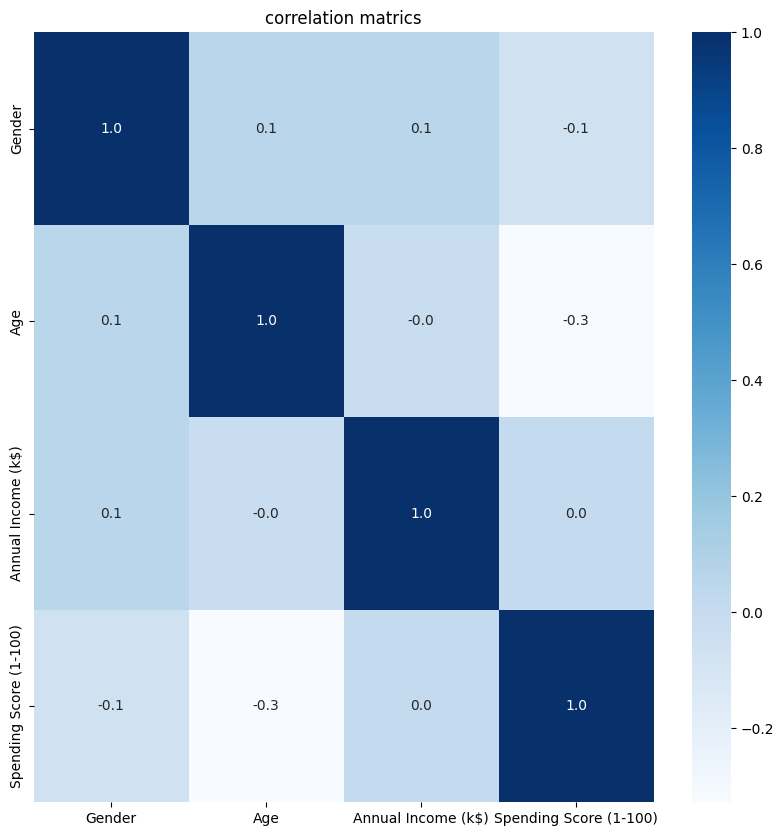

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,annot=True,fmt='.1f',cmap='Blues')
plt.title('correlation matrics')
plt.show()

In [29]:
x=cdata.iloc[:,[2,3]]

In [30]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [33]:
#determining the no.of clusters
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=3)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

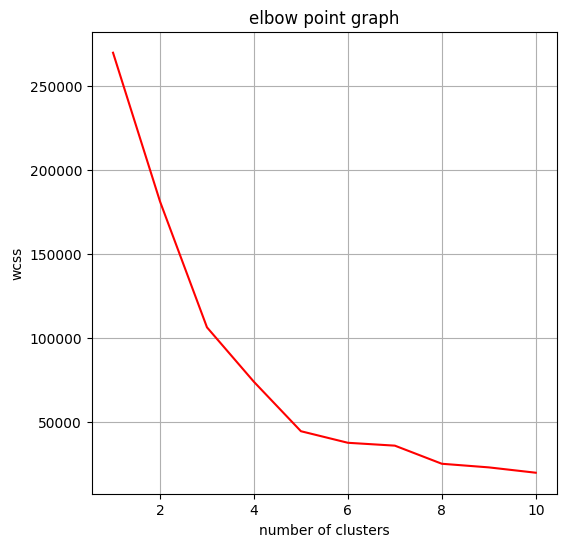

In [35]:
#plotting elbow curve
plt.figure(figsize=(6,6))
plt.grid()
plt.plot(range(1,11),wcss,color='red')
plt.title('elbow point graph')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

as we can see above that the graph becomes almost steady after we reach at no. of clusters =5
so we can say that 5 would be the optimum no. of clusters.

# Training the clustering mode

In [36]:
kmeans=KMeans(n_clusters=5,random_state=3)
y=kmeans.fit_predict(x)
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


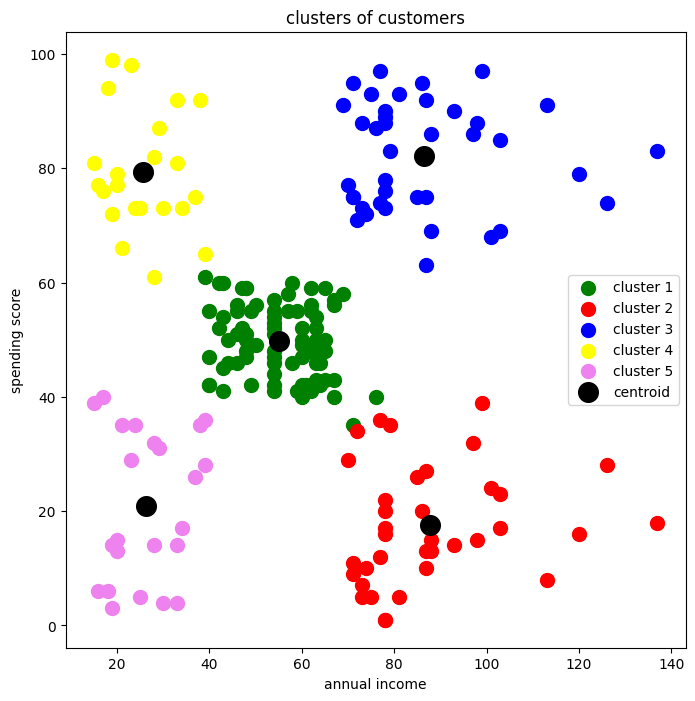

In [38]:
# Visulaising the clusters
plt.figure(figsize=(8,8))
plt.scatter(x.values[y==0,0],x.values[y==0,1],s=100,color='green',label='cluster 1')
plt.scatter(x.values[y==1,0],x.values[y==1,1],s=100,color='red',label='cluster 2')
plt.scatter(x.values[y==2,0],x.values[y==2,1],s=100,color='blue',label='cluster 3')
plt.scatter(x.values[y==3,0],x.values[y==3,1],s=100,color='yellow',label='cluster 4')
plt.scatter(x.values[y==4,0],x.values[y==4,1],s=100,color='violet',label='cluster 5')
#plotting the centriods
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,color='black',label='centroid')
plt.title('clusters of customers')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.legend()
plt.show()